In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ROOT_FOLDER = '/content/drive/MyDrive/'

In [5]:
# data is now our pandas DataFrame containing all of the data from our csv file
df = pd.read_csv(ROOT_FOLDER + "eviction_num_by_muni.csv",index_col=0)

In [6]:
# data is now our pandas DataFrame containing all of the data from our csv file
household = pd.read_csv(ROOT_FOLDER + "household_muni.csv",index_col=0)

In [7]:
household_new = pd.merge(household, df[df.index.isin(household.index)], left_on=household.index, right_on=df[df.index.isin(household.index)].index)
household_new = household_new.drop(['Eviction Numbers'], axis=1)
household_new.rename(columns={'key_0':'Muni'}, inplace=True)
household_new = household_new.drop('Evictions per Rented Households', axis=1)
household_new['Evictions per Rented Households']= household_new[' eviction_num']/household_new['Renter Occupied']
household_new = household_new.sort_values('Evictions per Rented Households', ascending=False)

In [8]:
#income per household per municipality
income = pd.read_csv(ROOT_FOLDER+'2019_5Y_Income.csv',skiprows=1)
#occupation of people in municipalities
occupation = pd.read_csv(ROOT_FOLDER+'2019_5Y_Occupation.csv',skiprows=1)
#educational attainments of people in a municipality
edu = pd.read_csv(ROOT_FOLDER+'2019_5Y_EducationalAttainment.csv',skiprows=1)
#data of evictions
cdf = pd.read_csv(ROOT_FOLDER+'eviction_num_by_muni.csv')

counts = cdf[cdf['property_address_city'].isin(household.index)]
counts.rename(columns={'property_address_city':'Muni','eviction_num':'Eviction Numbers'},inplace=True)

# #data cleaning function 1
def df_clean(df):
    muni_list = []
    for x in range(df.shape[0]):
        wsplit = []
        wsplit = df.iloc[x]['Geographic Area Name'].split()
        word = ' '
        reject_list = ['town','Town','city','City','city,','City,','town,','Town,']
        for w in wsplit:
            if w in reject_list:
                break
            else:    
                word += ' ' + w 
        muni_list.append(word)    
    df['Geographic Area Name'] = muni_list
    df['Geographic Area Name'] = df['Geographic Area Name'].str.lstrip()
    df['Geographic Area Name'] = df['Geographic Area Name'].str.rstrip()    
    
    return df

#data cleaning function 2
def keep_estimates(idf):
    boolCols = idf.columns.str.contains('Estimate')
    newCols = list(idf.columns[0:2])
    for col in range(2,len(boolCols)):
        if boolCols[col] == True:
            newCols.append(idf.columns[col])
    df = idf[newCols]
    
    return df

income = df_clean(keep_estimates(income));
occupation = df_clean(keep_estimates(occupation));
edu = df_clean(keep_estimates(edu));

#Merging munis with corresponding socio-economic features
income_df =  pd.merge(counts,income,left_on='Muni',right_on='Geographic Area Name').drop(columns=['id','Geographic Area Name'])
occu_df =  pd.merge(counts,occupation,left_on='Muni',right_on='Geographic Area Name').drop(columns=['id','Geographic Area Name'])
edu_df =  pd.merge(counts,edu,left_on='Muni',right_on='Geographic Area Name').drop(columns=['id','Geographic Area Name'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [9]:
occu_with_rate = pd.merge(household_new, occu_df, left_on=household_new['Muni'], right_on=income_df.Muni)
occu_with_rate = occu_with_rate.drop(['Muni_x', 'Muni_y', ' eviction_num_y'], axis=1)
occu_with_rate.rename(columns={'key_0':'Muni', ' eviction_num_x': 'eviction_num'}, inplace=True)

In [24]:
occu_with_rate
occu_with_rate.rename(columns={'eviction_num': 'Eviction Numbers'}, inplace=True)
#pd.set_option('display.max_columns', None)

In [18]:
occu_with_rate['Management, business, science, and arts occupations'] = occu_with_rate['Estimate!!Total!!Civilian employed population 16 years and over!!Management, business, science, and arts occupations:'] / occu_with_rate['Estimate!!Total!!Civilian employed population 16 years and over'] * 100
# occu_with_rate['bussiness'] = 
occu_with_rate['Service occupations'] = occu_with_rate['Estimate!!Total!!Civilian employed population 16 years and over!!Service occupations:'] / occu_with_rate['Estimate!!Total!!Civilian employed population 16 years and over'] * 100
occu_with_rate['Sales and office occupations'] = occu_with_rate['Estimate!!Total!!Civilian employed population 16 years and over!!Sales and office occupations:'] / occu_with_rate['Estimate!!Total!!Civilian employed population 16 years and over'] * 100
occu_with_rate['Natural resources, construction, and maintenance occupations'] = occu_with_rate['Estimate!!Total!!Civilian employed population 16 years and over!!Natural resources, construction, and maintenance occupations:']/ occu_with_rate['Estimate!!Total!!Civilian employed population 16 years and over'] * 100
occu_with_rate['Production, transportation, and material moving occupations'] = occu_with_rate['Estimate!!Total!!Civilian employed population 16 years and over!!Production, transportation, and material moving occupations:'] / occu_with_rate['Estimate!!Total!!Civilian employed population 16 years and over'] * 100

In [19]:
rcolumns = ['Muni', 'Management, business, science, and arts occupations', 'Service occupations', 'Sales and office occupations', 
           'Natural resources, construction, and maintenance occupations', 'Production, transportation, and material moving occupations']

In [20]:
#brackets
one_to_ten_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/1kTO10K.csv',skiprows=1)
ten_to_fifty_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/10kTO50K.csv',skiprows=1)
fifty_to_90_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/50kTO90K.csv',skiprows=1)
ninty_to_200_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/90kTO200K.csv',skiprows=1)

In [25]:
edu_one_to_ten_k = occu_with_rate[occu_with_rate["Muni"].isin(one_to_ten_k.Middleton.append(pd.Series('Middleton')))]

low_three_1 = edu_one_to_ten_k[edu_one_to_ten_k['Eviction Numbers'] >=20].sort_values('Evictions per Rented Households', ascending=False).head(5).filter(rcolumns, axis=1)
top_three_1 = edu_one_to_ten_k[edu_one_to_ten_k['Eviction Numbers'] >=10].sort_values('Evictions per Rented Households').head(5).filter(rcolumns, axis=1)

race_1 = pd.concat([low_three_1, top_three_1.reindex(index=top_three_1.index[::-1])])

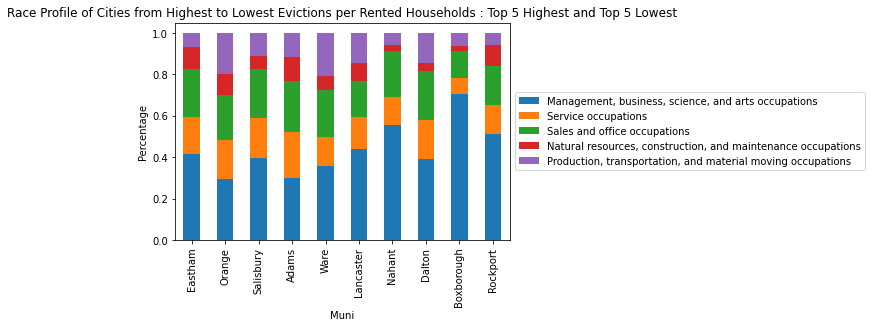

In [37]:
f = plt.figure()

plt.title('Race Profile of Cities from Highest to Lowest Evictions per Rented Households : Top 5 Highest and Top 5 Lowest', color='black')
race_1.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage")
plt.show()

In [27]:
edu_ten_to_fifty_k = occu_with_rate[occu_with_rate["Muni"].isin(ten_to_fifty_k.Everett.append(pd.Series('Everett')))]

low_three_2 = edu_ten_to_fifty_k[edu_ten_to_fifty_k['Eviction Numbers'] >=10].sort_values('Evictions per Rented Households', ascending=False).head(5).filter(rcolumns, axis=1)
top_three_2 = edu_ten_to_fifty_k[edu_ten_to_fifty_k['Eviction Numbers'] >=10].sort_values('Evictions per Rented Households').head(5).filter(rcolumns, axis=1)

race_2 = pd.concat([low_three_2, top_three_2.reindex(index=top_three_2.index[::-1])])

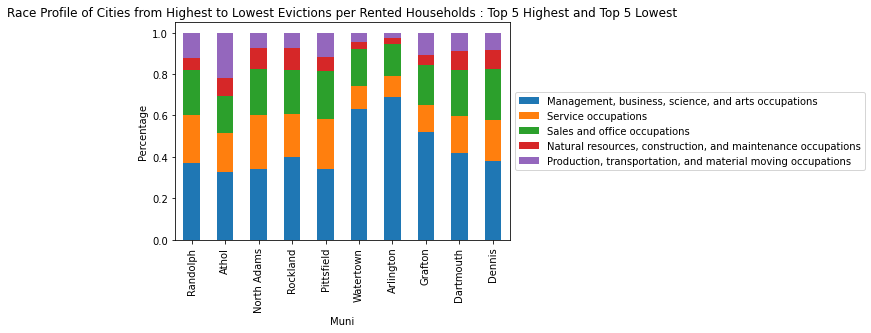

In [28]:
f = plt.figure()

plt.title('Race Profile of Cities from Highest to Lowest Evictions per Rented Households : Top 5 Highest and Top 5 Lowest', color='black')
race_2.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage")
plt.show()

In [31]:
edu_fifty_to_90_k = occu_with_rate[occu_with_rate["Muni"].isin(fifty_to_90_k['Fall River'].append(pd.Series('Fall River')))]
low_three_3 = edu_fifty_to_90_k[edu_fifty_to_90_k['Eviction Numbers'] >=10].sort_values('Evictions per Rented Households', ascending=False).head(5).filter(rcolumns, axis=1)
top_three_3 = edu_fifty_to_90_k[edu_fifty_to_90_k['Eviction Numbers'] >=10].sort_values('Evictions per Rented Households').head(5).filter(rcolumns, axis=1)

race_3 = pd.concat([low_three_3, top_three_3.reindex(index=top_three_3.index[::-1])])

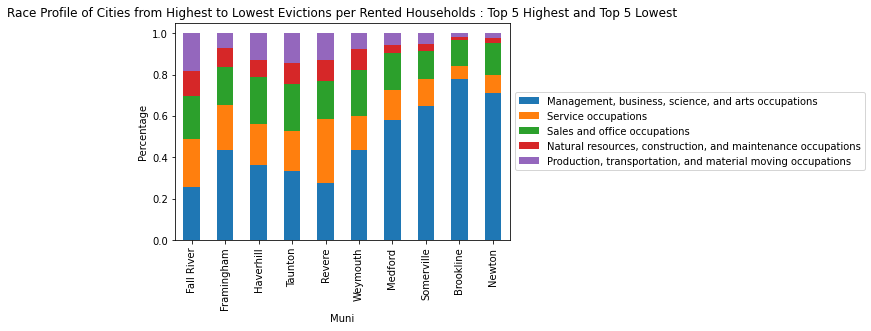

In [32]:
f = plt.figure()

plt.title('Race Profile of Cities from Highest to Lowest Evictions per Rented Households : Top 5 Highest and Top 5 Lowest', color='black')
race_3.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage")
plt.show()

In [33]:
edu_ninty_to_200_k = occu_with_rate[occu_with_rate["Muni"].isin(ninty_to_200_k['Worcester'].append(pd.Series('Worcester')))]

race_4 = edu_ninty_to_200_k[edu_ninty_to_200_k['Eviction Numbers'] >=10].sort_values('Evictions per Rented Households', ascending=False).filter(rcolumns, axis=1)

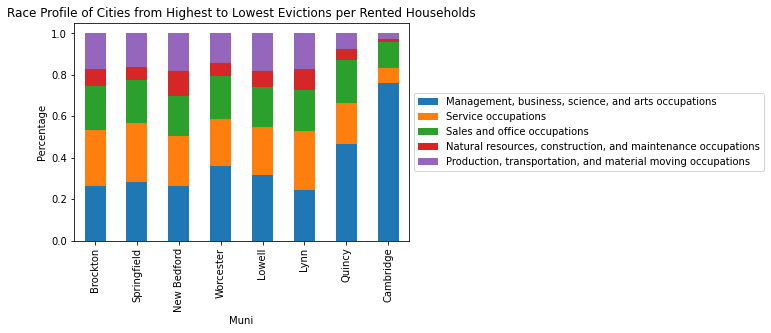

In [34]:
f = plt.figure()

plt.title('Race Profile of Cities from Highest to Lowest Evictions per Rented Households', color='black')
race_4.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage")
plt.show()

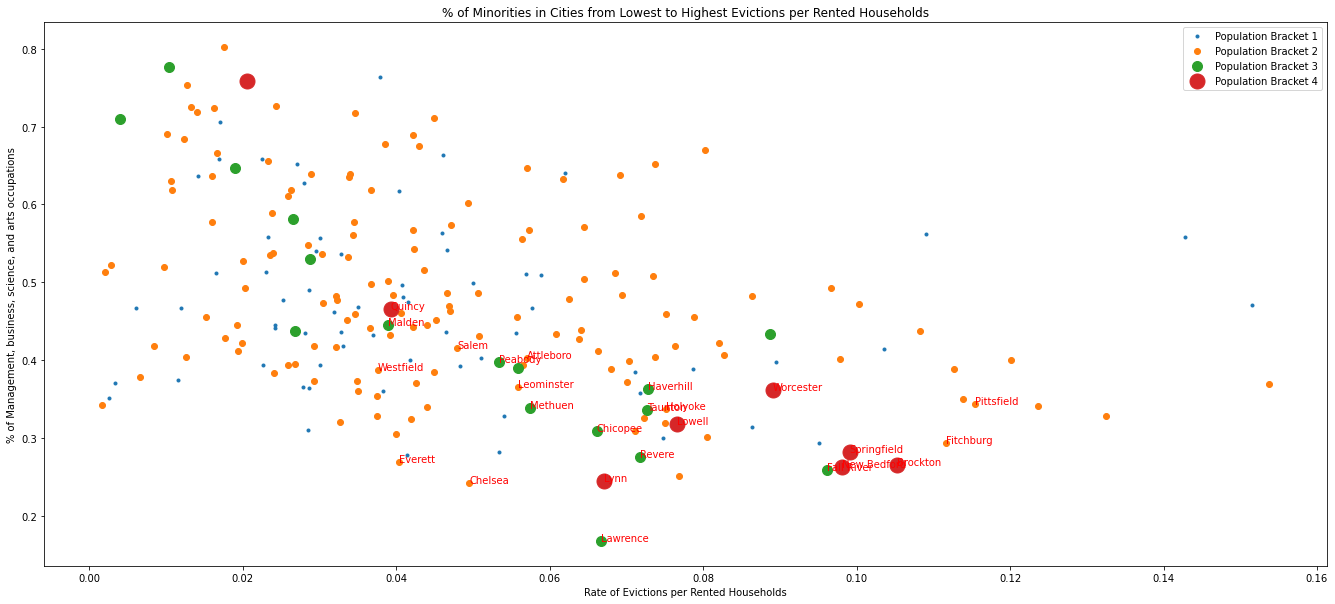

In [36]:
plt.figure(figsize=(23,10))

plt.plot(edu_one_to_ten_k['Evictions per Rented Households'], edu_one_to_ten_k["Management, business, science, and arts occupations"], 'o',
             label="Population Bracket 1", markersize=3)

# for city in (race_1["Muni"].tolist()):
#   plt.annotate(city, (edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == city]['Evictions per Rented Households'], 
#                         edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == city]["Management, business, science, and arts occupations"]))

plt.plot(edu_ten_to_fifty_k['Evictions per Rented Households'], edu_ten_to_fifty_k["Management, business, science, and arts occupations"], 'o',
             label="Population Bracket 2")

# for city in (race_2["Muni"].tolist()):
#   plt.annotate(city, (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
#                         edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]["Management, business, science, and arts occupations"]))


gateway_cities = ["Attleboro", "Brockton", "Chelsea", "Chicopee", "Everett", "Fall River", "Fitchburg", "Haverhill", "Holyoke",
                  "Lawrence", "Leominster", "Lowell", "Lynn", "Malden", 
                  "Methuen", "New Bedford", "Peabody", "Pittsfield", "Quincy", "Revere", "Salem", "Springfield", "Taunton", "Westfield", "Worcester"]
for city in gateway_cities: 
  if city in edu_ten_to_fifty_k["Muni"].tolist():
    plt.annotate(city, (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
                            edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]["Management, business, science, and arts occupations"]), color='Red')

plt.plot(edu_fifty_to_90_k['Evictions per Rented Households'], edu_fifty_to_90_k["Management, business, science, and arts occupations"], 'o',
             label="Population Bracket 3", markersize=10)

# for city in (race_3["Muni"].tolist()):
#   plt.annotate(city, (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]['Evictions per Rented Households'], 
#                         edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]["Management, business, science, and arts occupations"]))

for city in gateway_cities: 
  if city in edu_fifty_to_90_k["Muni"].tolist():
    plt.annotate(city, (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]['Evictions per Rented Households'], 
                            edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == city]["Management, business, science, and arts occupations"]), color='Red')


plt.plot(edu_ninty_to_200_k['Evictions per Rented Households'], edu_ninty_to_200_k["Management, business, science, and arts occupations"], 'o',
             label="Population Bracket 4", markersize=15)

for city in gateway_cities: 
  if city in edu_ninty_to_200_k["Muni"].tolist():
    plt.annotate(city, (edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == city]['Evictions per Rented Households'], 
                            edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == city]["Management, business, science, and arts occupations"]), color='Red')

plt.title('% of Minorities in Cities from Lowest to Highest Evictions per Rented Households', color='black')
plt.xlabel("Rate of Evictions per Rented Households")
plt.ylabel("% of Management, business, science, and arts occupations")
plt.legend(numpoints=1)
plt.show()